# Box plot

In [1]:
import pandas as pd
%matplotlib inline
%config InlineBacken.figure_format = 'svg'

In [2]:
df = pd.read_csv('data.csv', index_col='City')

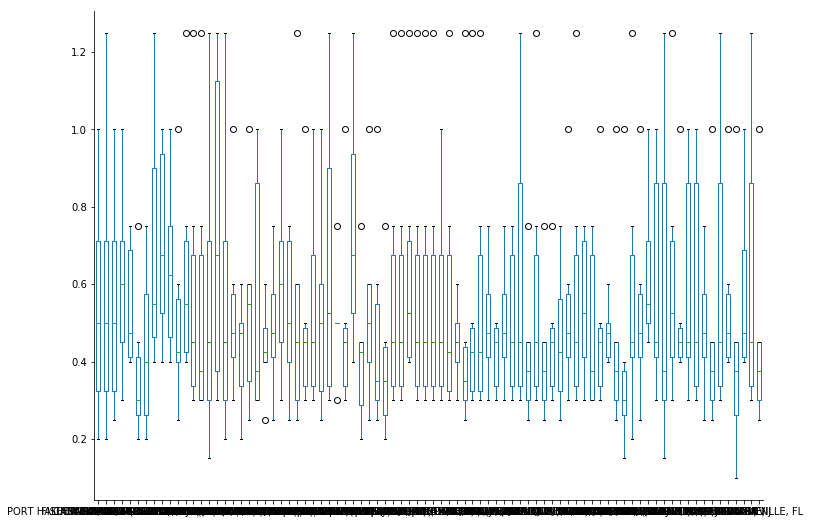

In [3]:
# T is transpose index and columns
#ax = df.T.plot.box(notch=True, showmeans=True)
ax = df.T.plot.box(figsize=(12, 9))
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')